Student Name: Marion Osong

Student Pace: DSF-FT12-Hybrid

Instructor Name: Samuel Karu

## **🎬MOVIE COMPANY PROJECT.** ##

### *Box office perfomance analysis for new Movie studio.* ###

## 🎬Introduction ##



## 🎯Problem statement ##
"Our company aims to establish a new movie studio but lacks experience in film production. To guide the development of a successful film portfolio, we need to analyze historical box office data to identify patterns and factors that contribute to a film's financial success. This analysis will provide actionable insights to inform strategic decisions on genre selection, casting, budgeting, and marketing, ensuring the creation of films with high potential for profitability."
## Objectives ##
### *1. Undestanding and analyze historical Box Office Data.* ####
The Boxoffice Company is a leading global provider of media, technology, and data solutions for the film industry.They partner with top studios, search platforms, and over 300 exhibition partners to connect with moviegoers through tools for ticketing, marketing, and business intelligence.
- **Goal:** 
To identify patterns that inform future project selections.
To also understand the genres that have historically performed well.
      
### *2. Understanding the dataset.* ###
- **Tasks**
   - Understand the technical terms used in the dataset.
   - Review the shape and type of the data, understand the numerical and categorical columns. 
   - Handle missing values (drop or replace). 
   - Identify and remove duplicates. 
   - Drop unnecessary columns and add new ones as needed<p>

### *3. Business objectives.* ###
- **Tasks**
- Analyze cost structures of successful films to identify areas for cost optimization.

- Develop models to predict the return on investment for different types of films.

### *4. statistics.* ###
- **Trend Analysis**
-

### **🔍DATA LOADING.** ###

This step is crucial for ensuring that data is accessible, consistent, and ready for subsequent analysis or modeling

In [176]:
# import the necessary libraries for data analysis and visualization.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import seaborn as sns
%matplotlib inline

In [177]:
# load the dataset and display the first 5 rows.
df = pd.read_csv('../zipped-data/bom.movie_gross.csv/bom.movie_gross.csv')
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [178]:
# understanding the dataframe and its structure. (Get column attributes and data types.)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [179]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [180]:
df.shape

(3387, 5)

In [181]:
df.describe(include='all')

,title,studio,domestic_gross,foreign_gross,year
count,3387,3382,3.359000e+03,2037,3387.000000
unique,3386,257,NaN,1204,NaN
top,Bluebeard,IFC,NaN,1200000,NaN
freq,2,166,NaN,23,NaN
mean,NaN,NaN,2.874585e+07,NaN,2013.958075
std,NaN,NaN,6.698250e+07,NaN,2.478141
min,NaN,NaN,1.000000e+02,NaN,2010.000000
25%,NaN,NaN,1.200000e+05,NaN,2012.000000
50%,NaN,NaN,1.400000e+06,NaN,2014.000000
75%,NaN,NaN,2.790000e+07,NaN,2016.000000


In [182]:
# Total number of null values in the dataset.
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [183]:
# Total number of duplicates in the dataset.
df.duplicated().sum()

0

In [184]:
# Total number of the categorical data in the dataset.
df.describe(include='object')

,title,studio,foreign_gross
count,3387,3382,2037
unique,3386,257,1204
top,Bluebeard,IFC,1200000
freq,2,166,23


In [185]:
# Total number of numerical data in the dataset.
df.describe(include='number')

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### *📝Summary of the dataset.* ###
- The dataset has a total number of 5 colums and 3387 rows in total.
- Each row represents movie name.
- The dataset has a number of missing values:
    - The studio column has 5 missing values.
    - The domestic_gross column has 28 missing values.
    - foreign_gross: The foreign box office gross revenue
    - The domestic_gross column has 28 missing values.
- The columns consist of:
    - title: The title of the movie.
    - studio: The studio that produced the movie (with some missing values).
    - domestic_gross: The domestic box office gross revenue (with some missing values).
    - foreign_gross: The foreign box office gross revenue (The column the most missing values).
    - year: The year the movie was released.




In [186]:
# loading the sqlite3 library to create a connection to the database.
conn = sqlite3.connect(r'C:\Users\ADMIN\Documents\box-office-movie-insights\zipped-data\im.db\im.db')
cursor = conn.cursor()

In [187]:
imdb_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
imdb_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [188]:
# Load data from the movie_basics table
imdb_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
imdb_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [189]:
# retrieve data from various tables
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
directors = pd.read_sql_query("SELECT * FROM directors", conn)
writers = pd.read_sql_query("SELECT * FROM writers", conn)
persons = pd.read_sql_query("SELECT * FROM persons", conn)

#preview the first few rows of each table
print(movie_basics.head(10)), "\n"
print(movie_ratings.head(10)), "\n"
print(directors.head(10)), "\n"
print(writers.head(10)), "\n"
print(persons.head(10)), "\n"

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
5  tt0111414                      A Thin Life                 A Thin Life   
6  tt0112502                          Bigfoot                     Bigfoot   
7  tt0137204                  Joe Finds Grace             Joe Finds Grace   
8  tt0139613                       O Silêncio                  O Silêncio   
9  tt0144449            Nema aviona za Zagreb       Nema aviona za Zagreb   

   start_year  runtime_minutes                      genres  
0        2013            175.0          Action,Crime,Drama  
1        2019            114.0

(None, '\n')

In [190]:
# Load Bom.movie_gross dataset
box_df = pd.read_csv(r'../zipped-data/bom.movie_gross.csv/bom.movie_gross.csv')
# Connect to IMDB SQLite database
conn = sqlite3.connect(r'C:\Users\ADMIN\Documents\box-office-movie-insights\zipped-data\im.db\im.db')

### **🧹DATA CLEANING.** ###
since we have understood the basic data structure and the data types, we now clean the dataset before we can perform Explorative Data Analysis. 

### *Dropping duplicates* ###

In [191]:
# Check and drop duplicates in each DataFrame
datasets = {
    "box_df": box_df,
    "movie_basics": movie_basics,
    "movie_ratings": movie_ratings,
    "directors": directors,
    "writers": writers,
    "persons": persons
}

for name, df in datasets.items():
    print(f"Checking duplicates in {name}: {df.duplicated().sum()} duplicates found.")
    datasets[name] = df.drop_duplicates()
    print(f"After dropping duplicates, {name} has shape: {datasets[name].shape}")


Checking duplicates in box_df: 0 duplicates found.
After dropping duplicates, box_df has shape: (3387, 5)
Checking duplicates in movie_basics: 0 duplicates found.
After dropping duplicates, movie_basics has shape: (146144, 6)
Checking duplicates in movie_ratings: 0 duplicates found.
After dropping duplicates, movie_ratings has shape: (73856, 3)
Checking duplicates in directors: 127639 duplicates found.
After dropping duplicates, directors has shape: (163535, 2)
Checking duplicates in writers: 77521 duplicates found.
After dropping duplicates, writers has shape: (178352, 2)
Checking duplicates in persons: 0 duplicates found.
After dropping duplicates, persons has shape: (606648, 5)


### *🛠️Handling missing values.* ###

1. Detecting missing values.
2. Handling missing values.
   - filling missing values.
   - Dropping missing values.

In [192]:
# handling missing values in the datasets.
for name, df in datasets.items():
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("\n")
    # Drop rows with missing values
    datasets[name] = df.dropna()
    print(f"After dropping missing values, {name} has shape: {datasets[name].shape}")
    

Missing values in box_df:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


After dropping missing values, box_df has shape: (2007, 5)
Missing values in movie_basics:
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


After dropping missing values, movie_basics has shape: (112232, 6)
Missing values in movie_ratings:
movie_id         0
averagerating    0
numvotes         0
dtype: int64


After dropping missing values, movie_ratings has shape: (73856, 3)
Missing values in directors:
movie_id     0
person_id    0
dtype: int64


After dropping missing values, directors has shape: (163535, 2)
Missing values in writers:
movie_id     0
person_id    0
dtype: int64


After dropping missing values, writers has shape: (178352, 2)
Missing values in persons:
person_id                  0
primary_name         

In [193]:
# 
def filling_missing(df):
    # Dropping duplicate rows
    df = df.drop_duplicates()

    # Dropping columns with more than 50% missing values
    df = df.dropna(thresh=0.3 * len(df), axis=1)


    # Filling missing values in numeric columns
    for col in df.select_dtypes(include=['number']).columns:
        if df[col].isna().sum() > 0:
            skewness = df[col].skew()
            fill_value = df[col].mean() if abs(skewness) < 0.5 else df[col].median()
            df[col].fillna(fill_value, inplace=True)
    
    # Filling missing values in categorical columns
    for col in df.select_dtypes(exclude=['number']).columns:
        if df[col].isna().sum() > 0:
            most_frequent = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
            df[col].fillna(most_frequent, inplace=True)

    return df
# Apply filling_missing function to all DataFrames

box_df = filling_missing(box_df)
movie_basics = filling_missing(movie_basics)
movie_ratings = filling_missing(movie_ratings)
directors = filling_missing(directors)
writers = filling_missing(writers)
persons = filling_missing(persons)

# Convert gross columns to numeric
box_df['domestic_gross'] = pd.to_numeric(box_df['domestic_gross'], errors='coerce')
box_df['foreign_gross'] = pd.to_numeric(box_df['foreign_gross'], errors='coerce')


In [194]:
# check for missing values and duplicates after cleaning
def check_duplicates_missing(df, name):
    print(f"--- {name} ---")
    print(f"Missing Values:\n{df.isnull().sum()}\n")
    print(f"Percentage of Missing Values:\n{(df.isnull().mean() * 100).round(2)}%\n")
    print(f"Number of Duplicates: {df.duplicated().sum()}\n")

# Apply the function to all datasets
for name, df in datasets.items():
    check_duplicates_missing(df, name)

--- box_df ---
Missing Values:
title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Percentage of Missing Values:
title             0.0
studio            0.0
domestic_gross    0.0
foreign_gross     0.0
year              0.0
dtype: float64%

Number of Duplicates: 0

--- movie_basics ---
Missing Values:
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

Percentage of Missing Values:
movie_id           0.0
primary_title      0.0
original_title     0.0
start_year         0.0
runtime_minutes    0.0
genres             0.0
dtype: float64%

Number of Duplicates: 0

--- movie_ratings ---
Missing Values:
movie_id         0
averagerating    0
numvotes         0
dtype: int64

Percentage of Missing Values:
movie_id         0.0
averagerating    0.0
numvotes         0.0
dtype: float64%

Number of Duplicates: 0

--- directors ---
Missing Values:
movie_id

### *Removing outliers* ###
The IQR method identifies outliers by determining the spread of the middle 50% of the data. It calculates the first quartile (Q1) and third quartile (Q3) and defines outliers as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [195]:
# removing outliers from the dataset using IQR method.
def remove_outliers(df, columns):
    for col in columns:
        if col in df.select_dtypes(include=['number']).columns:
        # Calculating  Quartiles.
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
        # Determining Boundaries.
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

movie_ratings = remove_outliers(movie_ratings, ['averagerating', 'numvotes'])
box_df = remove_outliers(box_df, ['domestic_gross', 'foreign_gross'])
movie_basics = remove_outliers(movie_basics, ['runtime_minutes'])
movie_ratings = remove_outliers(movie_ratings, ['averagerating', 'numvotes'])


### 🔗Merging Datasets ###

Merging datasets allows you to combine information from different sources into a cohesive structure. 

In [196]:
# Merge BOM DataFrame with Movie Basics DataFrame based on title and primary_title
merged_df = pd.merge(box_df, movie_basics, left_on='title', right_on='primary_title', how='left')

# merging with movie_ratings
final_df = pd.merge(merged_df, movie_ratings, on='movie_id', how='left')

# Merging with directors
final_df = pd.merge(final_df, directors, on='movie_id', how='left')

# Merging with writers
final_df = pd.merge(final_df, writers, on='movie_id', how='left')

# Drop duplicates
final_df = final_df.drop_duplicates(subset=['movie_id'])

# Fill missing values
final_df.fillna('Unknown', inplace=True)
# Final check
final_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 6277
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2143 non-null   object 
 1   studio           2143 non-null   object 
 2   domestic_gross   2143 non-null   float64
 3   foreign_gross    2143 non-null   float64
 4   year             2143 non-null   int64  
 5   movie_id         2143 non-null   object 
 6   primary_title    2143 non-null   object 
 7   original_title   2143 non-null   object 
 8   start_year       2143 non-null   object 
 9   runtime_minutes  2143 non-null   object 
 10  genres           2143 non-null   object 
 11  averagerating    2143 non-null   object 
 12  numvotes         2143 non-null   object 
 13  person_id_x      2143 non-null   object 
 14  person_id_y      2143 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 267.9+ KB


In [197]:
# Create a new column for total_gross
final_df['total_gross'] = final_df['domestic_gross'] + final_df['foreign_gross']

In [198]:
final_df.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id_x,person_id_y,total_gross
0,Get Him to the Greek,Uni.,61000000.0,30300000.0,2010,tt1226229,Get Him to the Greek,Get Him to the Greek,2010,109,"Adventure,Comedy,Music",Unknown,Unknown,nm0831557,nm0831557,91300000.0
2,The Last Song,BV,63000000.0,26100000.0,2010,tt1294226,The Last Song,The Last Song,2010,107,"Drama,Music,Romance",Unknown,Unknown,nm1455688,nm0817023,89100000.0
4,Letters to Juliet,Sum.,53000000.0,26100000.0,2010,tt0892318,Letters to Juliet,Letters to Juliet,2010,105,"Adventure,Comedy,Drama",Unknown,Unknown,nm0935095,nm1433580,79100000.0
6,Diary of a Wimpy Kid,Fox,64000000.0,11700000.0,2010,tt1196141,Diary of a Wimpy Kid,Diary of a Wimpy Kid,2010,94,"Comedy,Drama,Family",Unknown,Unknown,nm0294457,nm0066851,75700000.0
11,Easy A,SGem,58400000.0,16600000.0,2010,tt1282140,Easy A,Easy A,2010,92,"Comedy,Drama,Romance",Unknown,Unknown,nm0323239,nm1421629,75000000.0


### Visualizations ###
Data visualization is a pivotal aspect of data analysis, transforming complex datasets into comprehensible visual formats. By employing various graphical representations, analysts can uncover patterns, trends, and insights that might remain hidden in raw data.​



In [199]:
# Group movies by genres
grouped_by_genres = final_df.groupby('genres')

# Display the number of movies in each genre
movies_per_genre = grouped_by_genres.size().sort_values(ascending=False)
print(movies_per_genre)

genres
Drama                           308
Documentary                     147
Comedy,Drama                    111
Comedy,Drama,Romance            100
Drama,Romance                    85
                               ... 
Biography,Comedy,Documentary      1
Biography,Comedy                  1
Animation,Family                  1
Animation,Drama,Sci-Fi            1
Western                           1
Length: 290, dtype: int64


In [220]:
# the top 15 genres by total gross.
grouped_by_genres = final_df.groupby('genres')['total_gross'].sum().sort_values(ascending=False)

top_15_genres = grouped_by_genres.head(15)

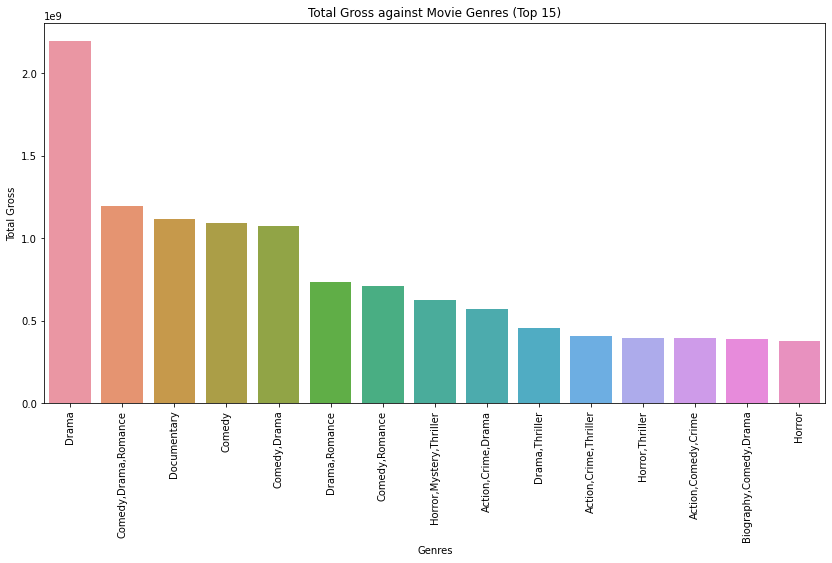

In [ ]:
# Total gross against top 15 movie genres.
plt.figure(figsize=(14, 7))
plt.title('Total Gross against Movie Genres (Top 15)')
sns.barplot(x=top_15_genres.index, y=top_15_genres.values, ci=None)
plt.xlabel('Genres')
plt.ylabel('Total Gross')
plt.xticks(rotation=90)
plt.show()

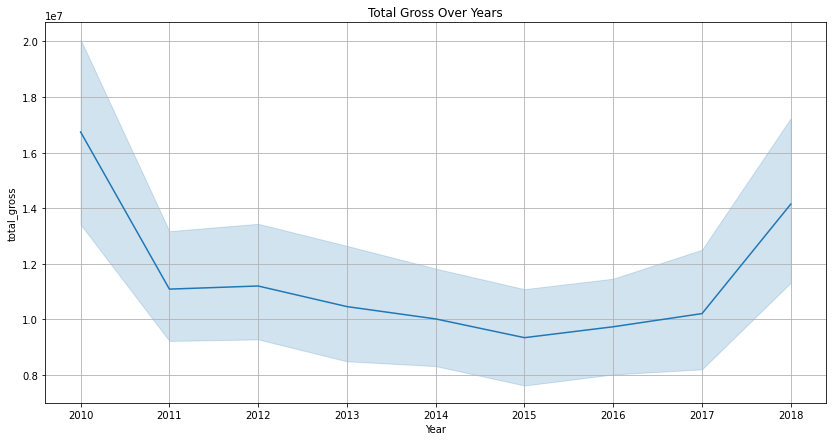

In [ ]:
# Total gross over years.
plt.figure(figsize=(14, 7))
sns.lineplot(data=final_df, x='year', y='total_gross', estimator='mean')
plt.title('Total Gross Over Years')
plt.xlabel('Year')
plt.ylabel('total_gross')
plt.xticks(rotation=0)
plt.grid()
plt.show()

In [ ]:
# 